In [2]:
!pip install numpy matplotlib opencv-python

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 6.4 MB/s eta 0:00:07
   --- ------------------------------------ 3.4/39.5 MB 11.7 MB/s eta 0:00:04
   ------- -------------------------------- 7.1/39.5 MB 14.0 MB/s eta 0:00:03
   ---------- ----------------------------- 10.5/39.5 MB 14.8 MB/s eta 0:00:02
   -------------- ------------------------- 14.2/39.5 MB 15.7 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/39.5 MB 16.9 MB/s eta 0:00:02
   ----------------------- ---------------- 23.1/39.5 MB 17.6 MB/s eta 0:00:01
   --------------------------- ------------ 27.5/39.5 MB 18.0 MB/s eta 0:00:01
   --------------------------------- ------ 33.3/39.5 MB 19.2 MB/s eta 0:00:01
   ---------------------------------------  39.1/39.5 MB 20.2 MB/s eta 0:00:01
   ---------------------------------------- 39.5/39.5 MB 19.1 MB/s


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

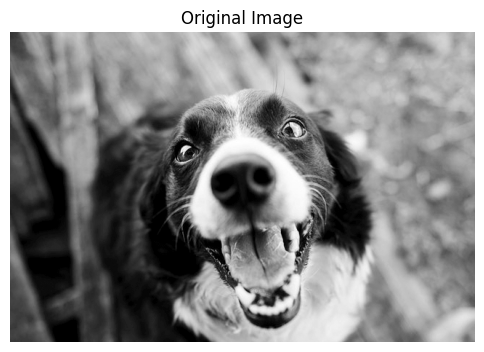

In [5]:
# Load the image in grayscale
image = cv2.imread('dog.png', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Convert image to float and normalize
image = image.astype(np.float32) / 255.0

# Center the data (standardization)
mean = np.mean(image, axis=0)
centered_image = image - mean

# Compute covariance matrix
cov_matrix = np.cov(centered_image, rowvar=False)


In [6]:
# Compute Eigenvalues and Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

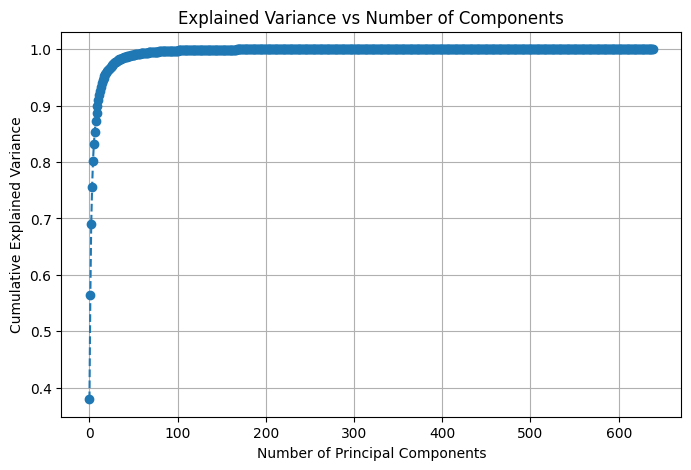

In [7]:
# Compute cumulative variance
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid()
plt.show()

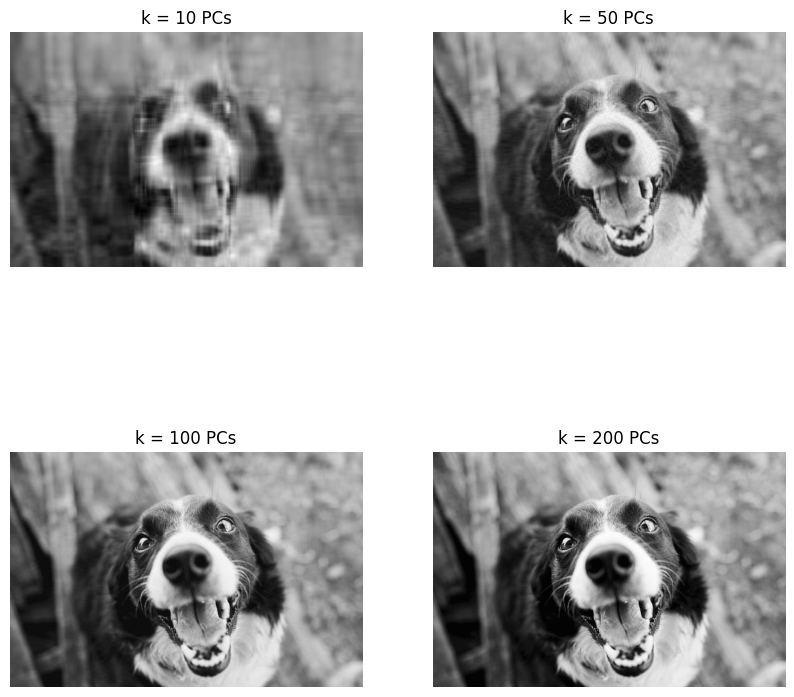

In [8]:
# Function to perform PCA compression and reconstruction
def reconstruct_image(k):
    top_eigenvectors = eigenvectors[:, :k]
    transformed = np.dot(centered_image, top_eigenvectors)
    reconstructed = np.dot(transformed, top_eigenvectors.T) + mean
    return reconstructed

# Experiment with different k values
k_values = [10, 50, 100, 200]  # Varying number of principal components

plt.figure(figsize=(10, 10))
for i, k in enumerate(k_values):
    reconstructed_image = reconstruct_image(k)
    
    plt.subplot(2, 2, i + 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'k = {k} PCs')
    plt.axis('off')

plt.show()

In [9]:
for k in k_values:
    compression_ratio = (k * (image.shape[1] + 1)) / (image.shape[0] * image.shape[1])
    print(f'k = {k} PCs -> Compression Ratio: {compression_ratio:.4f}')

k = 10 PCs -> Compression Ratio: 0.0235
k = 50 PCs -> Compression Ratio: 0.1173
k = 100 PCs -> Compression Ratio: 0.2346
k = 200 PCs -> Compression Ratio: 0.4691
